<h1><font color="#004D7F" size=6>COVID-19: ULAs</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Rodrigo Carrillo-Larco, Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Universidad Peruana Cayetano Heredia</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Ingeniería</font>

</div>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
* [2. Análisis Exploratorio de Datos](#section2)
    * [2.1. Limpieza de datos](#section21)
    * [2.2. Boxplots](#section22)
    * [2.3. Histogramas](#section23)
    * [2.4. Matriz de correlación](#section24)
    * [2.5. Matriz de dispersión](#section25)
* [3. Transformaciones categórico a dummy](#section3)
* [4. PCA + k-means](#section4)
* [5. Análisis clustering](#section5)
    * [5.1. Tamaño/Densidad de clústers](#section51)
    * [5.2. Centroides de clústers (Formas)](#section52)

---
<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import pandas as pd
import os

### Lectura de datos

In [3]:
df_original = pd.read_csv('dataset/data_2020-03-22.csv', parse_dates=[2])
df_original.head(1)

Country  Speed.Number first_date  order  total_deaths      p.db  \
0  Afghanistan      0.888889 2020-02-24     34             0  0.105599   

    ylds.db   p.copd  ylds.copd     p.hiv  ylds.hiv     p.tbc  ylds.tbc  \
0  0.052702  0.05014   0.030484  0.000186  0.000165  0.261146  0.001078   

     GDP_2017       pop_men     pop_women  prop_men  pm2.5  UHC_index_2017  
0  556.302138  1.674320e+07  1.611156e+07  0.509613   53.2              37

In [5]:
df = pd.read_csv('dataset/data_2020-03-22.csv', parse_dates=[2])
df.drop(['pop_men'], axis=1, inplace=True)
df.drop(['pop_women'], axis=1, inplace=True)
#df.drop(['p.db'], axis=1, inplace=True)
#df.drop(['p.copd'], axis=1, inplace=True)
#df.drop(['p.hiv'], axis=1, inplace=True)
#df.drop(['p.tbc'], axis=1, inplace=True)
df.drop(['ylds.db'], axis=1, inplace=True)
df.drop(['ylds.copd'], axis=1, inplace=True)
df.drop(['ylds.hiv'], axis=1, inplace=True)
df.drop(['ylds.tbc'], axis=1, inplace=True)
df.drop(['Country'], axis=1, inplace=True)
df.drop(['Speed.Number'], axis=1, inplace=True)
df.drop(['first_date'], axis=1, inplace=True)
df.drop(['order'], axis=1, inplace=True)
df.drop(['total_deaths'], axis=1, inplace=True)

---
<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---
<a id="section2"></a>
# <font color="#004D7F"> 2. Análisis Exploratorio de Datos</font>

In [6]:
df.dtypes

p.db              float64
p.copd            float64
p.hiv             float64
p.tbc             float64
GDP_2017          float64
prop_men          float64
pm2.5             float64
UHC_index_2017      int64
dtype: object

In [7]:
df.describe().transpose()

count          mean           std         min          25%  \
p.db            155.0      0.075416      0.024032    0.040218     0.058969   
p.copd          155.0      0.035794      0.010533    0.015853     0.028062   
p.hiv           155.0      0.007677      0.018914    0.000011     0.000456   
p.tbc           155.0      0.204458      0.101806    0.051712     0.122820   
GDP_2017        155.0  14913.661431  19415.536446  309.055355  2403.065919   
prop_men        155.0      0.501432      0.036320    0.459118     0.487198   
pm2.5           155.0     25.774194     17.370791    5.700000    14.150000   
UHC_index_2017  155.0     66.045161     15.452206   25.000000    55.000000   

                        50%           75%            max  
p.db               0.069308      0.089140       0.222176  
p.copd             0.034655      0.041736       0.082202  
p.hiv              0.001715      0.005737       0.119882  
p.tbc              0.195166      0.270030       0.519770  
GDP_2017        6284.192672  17470.845955  107361.306900  
prop_men           0.495217      0.502629       0.754109  
pm2.5             20.200000     32.900000      94.300000  
UHC_index_2017    71.000000     77.000000      89.000000

In [8]:
df.shape

(155, 8)

In [9]:
list_columns = df.columns

---
<a id="section21"></a>
## <font color="#004D7F"> 2.1. Data Cleaning: Handling missing data</font>

In [10]:
df.isnull().any().any(), df.shape

(False, (155, 8))

In [11]:
df.isnull().sum(axis=0)

p.db              0
p.copd            0
p.hiv             0
p.tbc             0
GDP_2017          0
prop_men          0
pm2.5             0
UHC_index_2017    0
dtype: int64

---
<a id="section22"></a>
## <font color="#004D7F"> 2.2. Boxplots</font>

<Figure size 432x288 with 0 Axes>

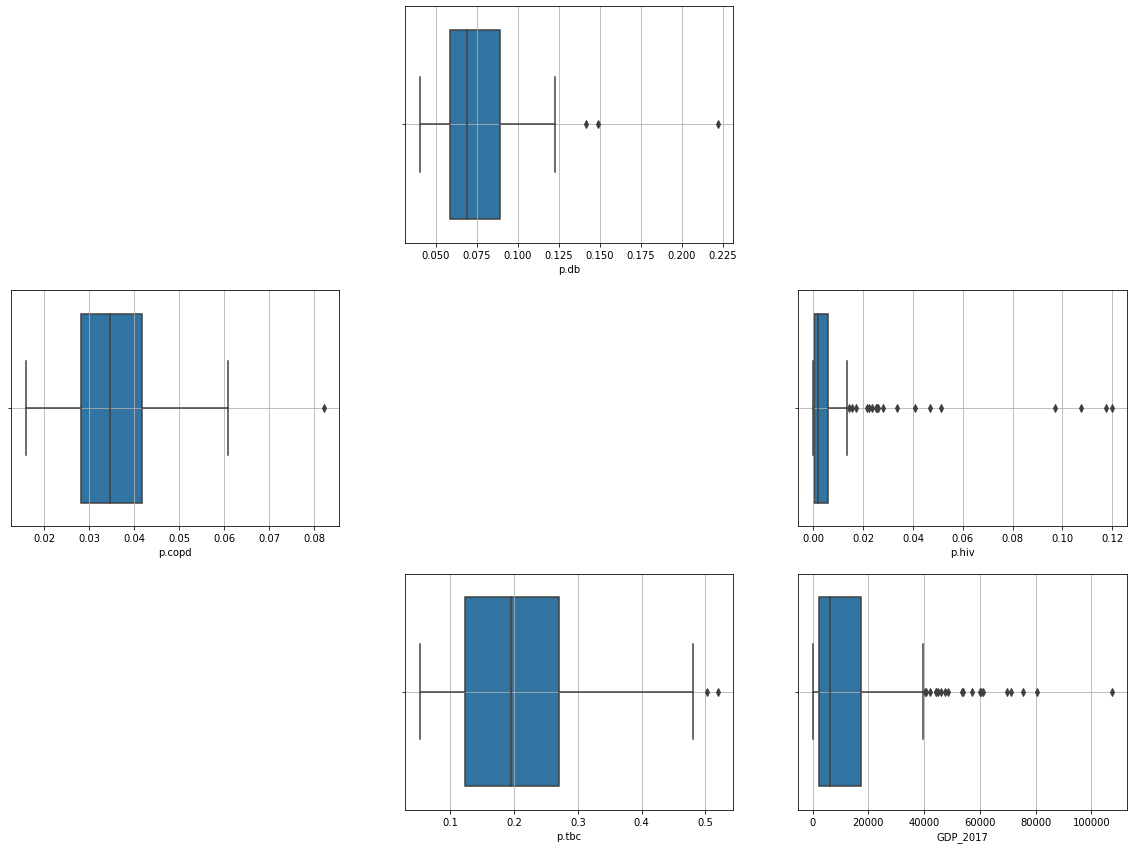

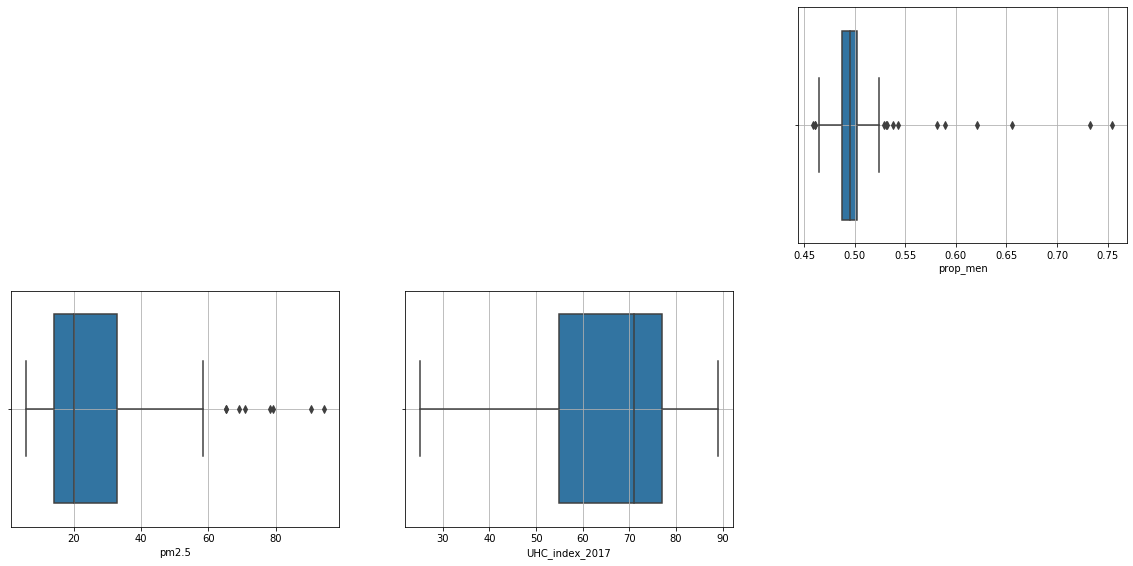

In [15]:
pl.figure(1)
plt.subplots(figsize=(20,20))
#pl.subplot(431)
#sns.boxplot(df["Speed.Number"])
#pl.grid(True)
pl.subplot(432)
sns.boxplot(df["p.db"])
pl.grid(True)
#pl.subplot(433)
#sns.boxplot(df["ylds.db"])
#pl.grid(True)
pl.subplot(434)
sns.boxplot(df["p.copd"])
pl.grid(True)
#pl.subplot(435)
#sns.boxplot(df["ylds.copd"])
#pl.grid(True)
pl.subplot(436)
sns.boxplot(df["p.hiv"])
pl.grid(True)
#pl.subplot(437)
#sns.boxplot(df["ylds.hiv"])
#pl.grid(True)
pl.subplot(438)
sns.boxplot(df["p.tbc"])
pl.grid(True)
pl.subplot(439)
sns.boxplot(df["GDP_2017"])
pl.grid(True)
#=======================
pl.figure(2)
plt.subplots(figsize=(20,20))
#pl.subplot(431)
#sns.boxplot(df["pop_men"])
pl.grid(True)
#pl.subplot(432)
#sns.boxplot(df["pop_women"])
#pl.grid(True)
pl.subplot(433)
sns.boxplot(df["prop_men"])
pl.grid(True)
pl.subplot(434)
sns.boxplot(df["pm2.5"])
pl.grid(True)
pl.subplot(435)
sns.boxplot(df["UHC_index_2017"])
pl.grid(True)


pl.show()

---
<a id="section23"></a>
## <font color="#004D7F"> 2.3. Histogramas</font>

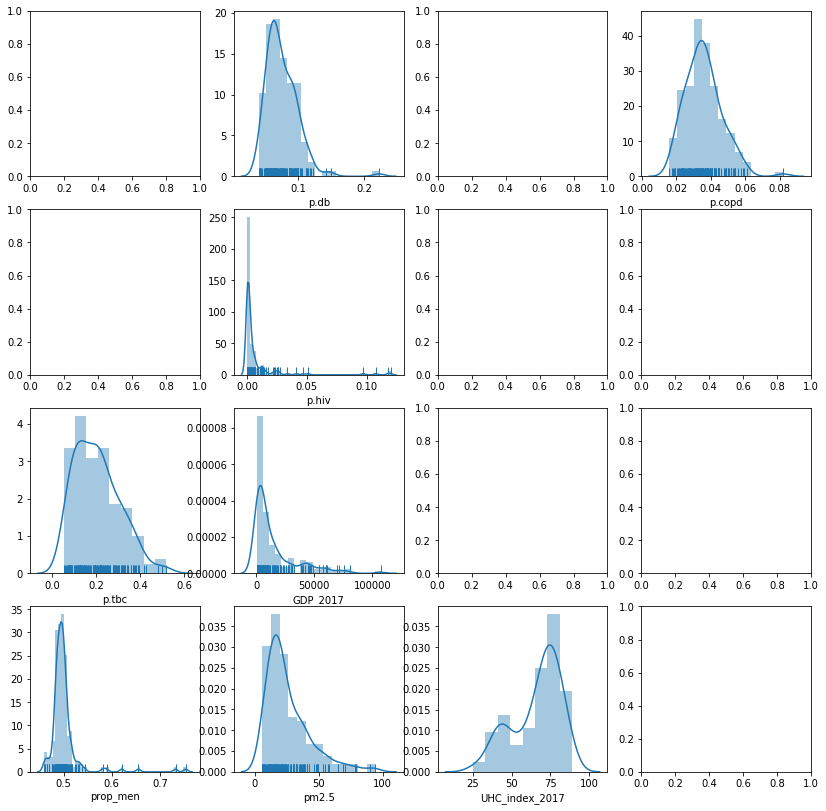

In [17]:
%matplotlib inline
# Univariate Histograms
f, axes = plt.subplots(4, 4, figsize=(14, 14))
#sns.distplot(df["Speed.Number"], rug=True, ax=axes[0, 0])
sns.distplot(df["p.db"], rug=True, ax=axes[0, 1])
#sns.distplot(df["ylds.db"], rug=True, ax=axes[0, 2])
sns.distplot(df["p.copd"], rug=True, ax=axes[0, 3])
#sns.distplot(df["ylds.copd"], rug=True, ax=axes[1, 0])
sns.distplot(df["p.hiv"], rug=True, ax=axes[1, 1])
#sns.distplot(df["ylds.hiv"], rug=True, ax=axes[1, 2])
sns.distplot(df["p.tbc"], rug=True, ax=axes[2, 0])
sns.distplot(df["GDP_2017"], rug=True, ax=axes[2, 1])
#sns.distplot(df["pop_men"], rug=True, ax=axes[2, 2])
#sns.distplot(df["pop_women"], rug=True, ax=axes[2, 3])
sns.distplot(df["prop_men"], rug=True, ax=axes[3, 0])
sns.distplot(df["pm2.5"], rug=True, ax=axes[3, 1])
sns.distplot(df["UHC_index_2017"], ax=axes[3, 2])

---
<a id="section24"></a>
## <font color="#004D7F"> 2.4. Matriz de correlación</font>

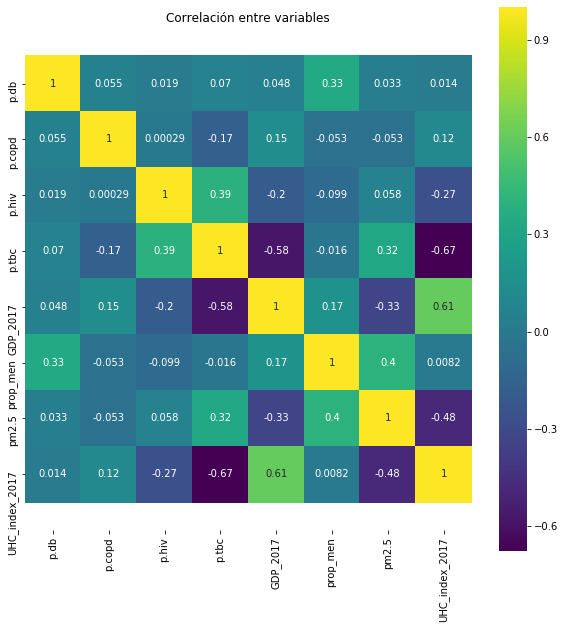

In [18]:
correlation = df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
# Esto se ponde debido al bug de Matplotlib 3.1.1 (quitarlo en versiones diferentes)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# ----------
plt.title('Correlación entre variables')
plt.show()

---
<a id="section25"></a>
## <font color="#004D7F"> 2.5. Matriz de dispersión</font>

Al igual que el diagrama de matriz de correlación anterior, la matriz de diagrama de dispersión es simétrica. Esto es útil para mirar las relaciones por pares desde diferentes perspectivas. Debido a que no tiene mucho sentido dibujar un diagrama de dispersión de cada variable consigo mismo, la diagonal muestra histogramas de cada atributo.

**Aquí es importante ver el comportamiento entre variables, es decir, si tienen un comportamiento clusterizado entre ambas o tiene un comportamiento lineal**

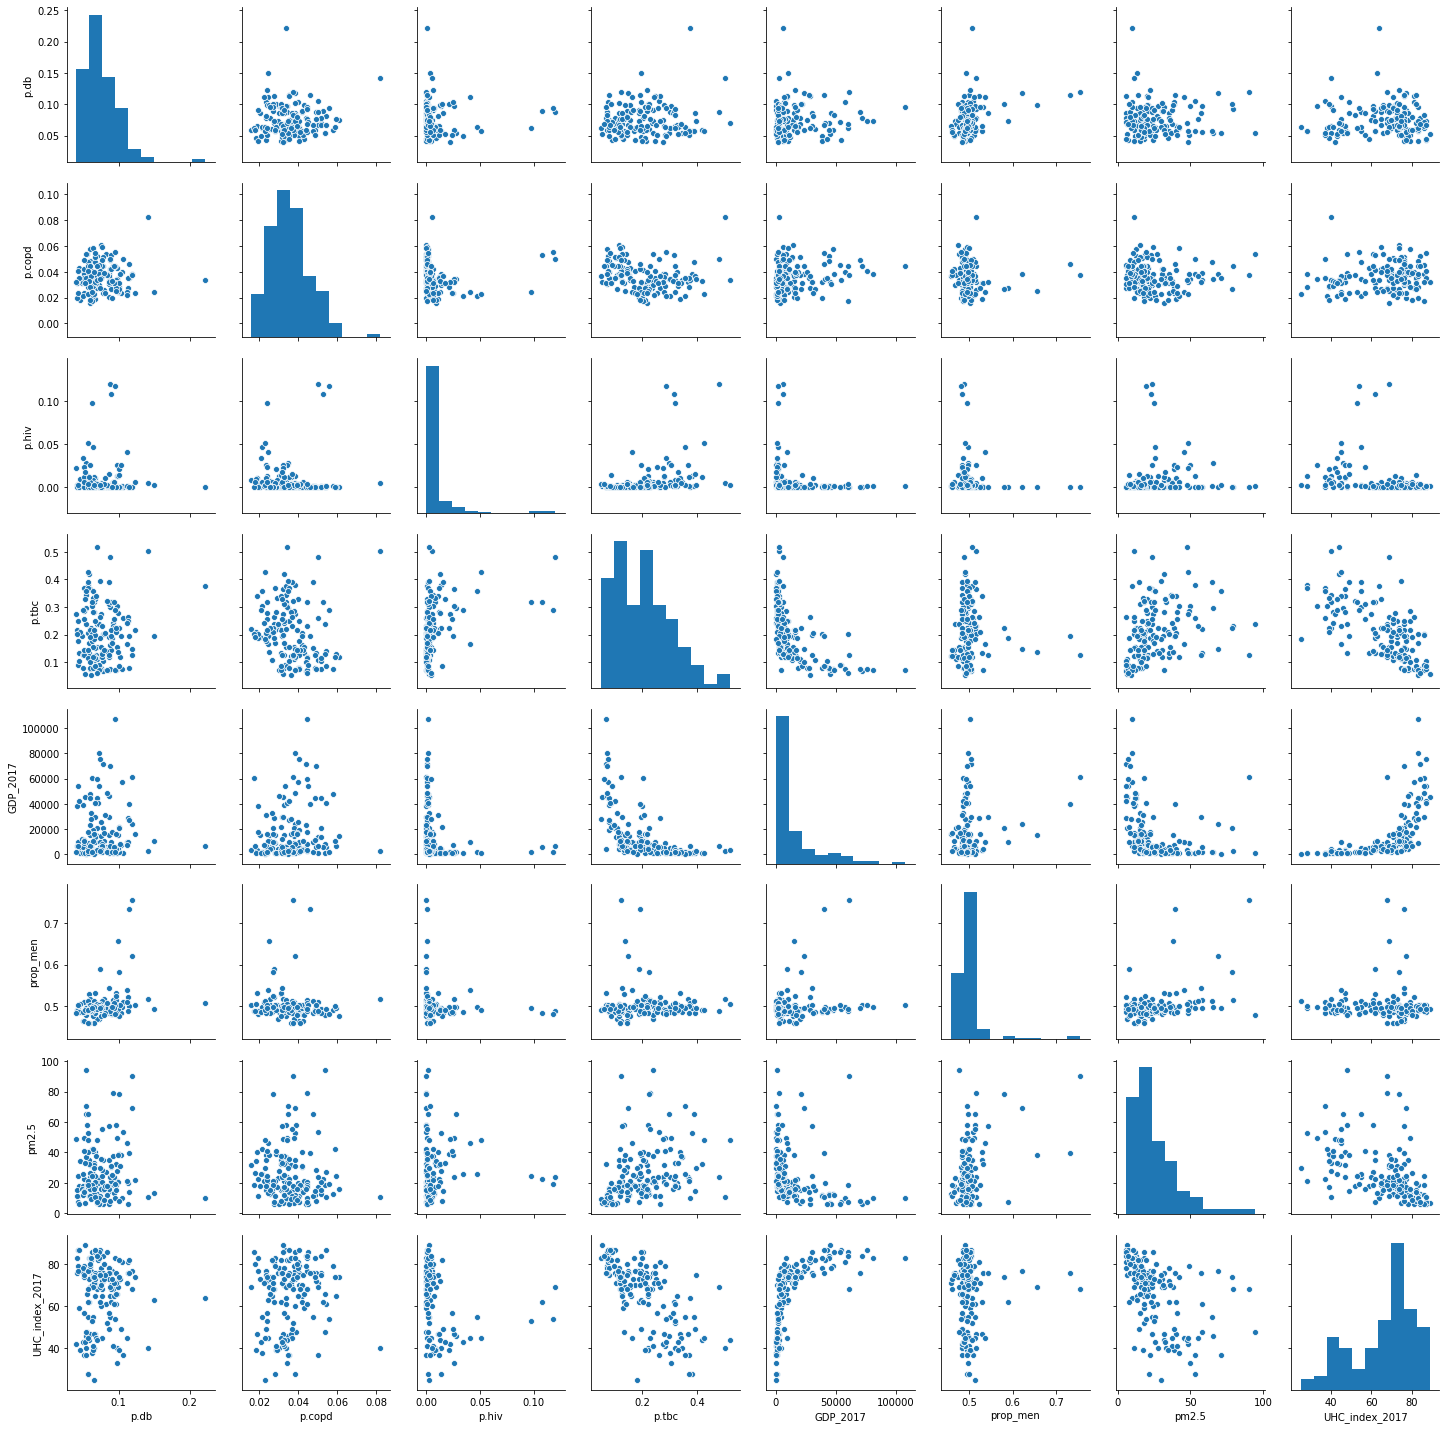

In [19]:
sns.pairplot(df);

---
<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---
<a id="section3"></a>
# <font color="#004D7F">3. Transformaciones categórico a dummy </font>

In [12]:
cat_features = ['Country', 'first_date']

#num_features = ['Speed.Number', 'order', 'total_deaths', 'p.db', 'ylds.db', 'p.copd', 'ylds.copd', 'p.hiv', 'ylds.hiv', 'p.tbc', 'ylds.tbc', 'GDP_2017', 'prop_men', 'pm2.5', 'UHC_index_2017']
num_features = ['Speed.Number', 'order', 'total_deaths', 'p.db', 'p.copd', 'p.hiv', 'p.tbc', 'GDP_2017', 'prop_men', 'pm2.5', 'UHC_index_2017']
#num_features = ['Speed.Number', 'order', 'total_deaths', 'ylds.db', 'ylds.copd', 'ylds.hiv', 'ylds.tbc', 'GDP_2017', 'prop_men', 'pm2.5', 'UHC_index_2017']


def generateonlyDummies2(X):
    outd_X = pd.DataFrame()
    categories = {}
    for c in cat_features:
        categories[c] = X[c].dropna().unique().tolist()
        
    for c in cat_features:
            # Cambiamos las variables object a categorical para que las categorias tengan siempre el mismo orden
            c_df = X[c].astype(pd.api.types.CategoricalDtype(categories = categories[c]))
            #c_df.reset_index(drop=True, inplace=True)
            # One-hot encoding. Utilizamos get_dummies de pandas!
            c_dummies = pd.get_dummies(c_df, prefix=c)
            outd_X = pd.concat([outd_X, c_dummies], axis=1)
    outc_X = pd.DataFrame(X[num_features],columns=num_features)
    
    for c in num_features:
        outd_X[c] = outc_X[c].values
    return outd_X

---
<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F">4.PCA + k-Means </font>

Se generan las variables dummies correspondientes y con ello ya se tiene listo el dataset para aplicar k-means.
El código en comentario es dependiendo las variables a analizar, también si hay que pasar a dummy o no.

Cambiar los componentes de PCA

O si no se utiliza PCA comentar el bloque correspondiente

In [20]:
df_original = pd.read_csv('dataset/data_2020-03-22.csv', parse_dates=[2])
df_original.head(1)

Country  Speed.Number first_date  order  total_deaths      p.db  \
0  Afghanistan      0.888889 2020-02-24     34             0  0.105599   

    ylds.db   p.copd  ylds.copd     p.hiv  ylds.hiv     p.tbc  ylds.tbc  \
0  0.052702  0.05014   0.030484  0.000186  0.000165  0.261146  0.001078   

     GDP_2017       pop_men     pop_women  prop_men  pm2.5  UHC_index_2017  
0  556.302138  1.674320e+07  1.611156e+07  0.509613   53.2              37

In [21]:
df = pd.read_csv('dataset/data_2020-03-22.csv', parse_dates=[2])
df.drop(['pop_men'], axis=1, inplace=True)
df.drop(['pop_women'], axis=1, inplace=True)
#df.drop(['p.db'], axis=1, inplace=True)
#df.drop(['p.copd'], axis=1, inplace=True)
#df.drop(['p.hiv'], axis=1, inplace=True)
#df.drop(['p.tbc'], axis=1, inplace=True)
df.drop(['ylds.db'], axis=1, inplace=True)
df.drop(['ylds.copd'], axis=1, inplace=True)
df.drop(['ylds.hiv'], axis=1, inplace=True)
df.drop(['ylds.tbc'], axis=1, inplace=True)
df.drop(['Country'], axis=1, inplace=True)
df.drop(['Speed.Number'], axis=1, inplace=True)
df.drop(['first_date'], axis=1, inplace=True)
df.drop(['order'], axis=1, inplace=True)
df.drop(['total_deaths'], axis=1, inplace=True)

In [22]:
df.head(1)

p.db   p.copd     p.hiv     p.tbc    GDP_2017  prop_men  pm2.5  \
0  0.105599  0.05014  0.000186  0.261146  556.302138  0.509613   53.2   

   UHC_index_2017  
0              37

In [23]:
df_dummy = df.copy()
#df_dummy= generateonlyDummies2(df)

In [24]:
df_dummy.head(1)

p.db   p.copd     p.hiv     p.tbc    GDP_2017  prop_men  pm2.5  \
0  0.105599  0.05014  0.000186  0.261146  556.302138  0.509613   53.2   

   UHC_index_2017  
0              37

In [25]:
from sklearn.decomposition import PCA
n_components = 3 # reducir de 67 a 40 variables
pca = PCA(n_components=n_components, iterated_power='auto', svd_solver='auto', whiten=True).fit(df_dummy)

In [26]:
pca_trans = pca.transform(df_dummy)

In [27]:
total_variance = np.cumsum(pca.explained_variance_ratio_)
total_variance[:5] # Cinco primeros...

array([0.99999889, 0.9999997 , 1.        ])

In [28]:
df_pca = pd.DataFrame(pca_trans)

In [29]:
df_dummyo = df_pca.copy()
#df_dummyo = df_dummy.copy()

In [30]:
df_dummyo.head(1)

0        1         2
0 -0.739479  1.74627  0.907929

In [31]:
from sklearn.metrics import pairwise_distances

def cost(data, k, centroids, clusters):
    cost = 0.0
    for c in range(k):
        points_cluster = data[clusters==c, :]
        if points_cluster.shape[0] > 0: 
            distances = pairwise_distances(points_cluster, [centroids[c]], metric='euclidean')
            cost += np.sum(distances**2)
    return cost/len(clusters)

0,1,2,3,4,5,6,7,8,9,

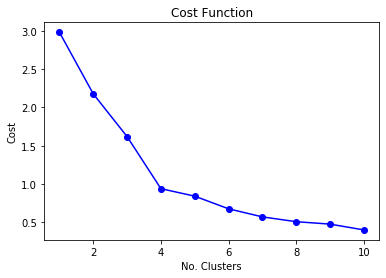

In [32]:
from sklearn.cluster import MiniBatchKMeans

# Arrat que guardará los costes
costsD = np.zeros(10,)
# Valores de k de 1 a 64
ks = 1+np.arange(10)
# Guarda los costes
#costs = np.zeros(20,)
# Valores de k de 5 a 125
#ks = np.linspace(1,20,20).astype(int)

# Ejecuta k-means para cada valor de k, y guarda el coste asociado
for i,k in enumerate(ks):
    kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=500)    
    kmeans.fit(df_dummyo.values)
    centroidsD = kmeans.cluster_centers_
    clustersD = kmeans.labels_
    costsD[i] = cost(df_dummyo.values, k, centroidsD, clustersD)
    print(i,end=',')

plt.xlabel('No. Clusters')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.plot(ks,costsD, 'bo-'); 
plt.savefig('coste.eps', format='eps', dpi=400)

In [33]:
for i in range(10):
    print(costsD[i])

2.982003796388678
2.177583050237878
1.6203241893674032
0.939629902780109
0.8420055700486618
0.6767450900331292
0.5713868959553393
0.5084328313116632
0.47695589796201515
0.40100944597848864


In [34]:
np.mean(costsD)

1.1196076670063364

La gráfica muestra claramente que existe un punto a partir del cual la disminución del coste es significativamente más lenta. En concreto, hasta 2-4 clusters, la disminución del coste es considerable. A partir de ese punto, es mucho más lenta. 

### Con 2 clústers

In [35]:
from sklearn.cluster import KMeans
# Elegimos con 2 clusters
km_2 = KMeans(n_clusters=2, init='k-means++', max_iter=500, random_state=0)
df_dummy = df_dummyo.copy()
km_2.fit(df_dummy)
df_dummy_2 = df_dummy.copy()
df_dummy_2['label'] = km_2.labels_
df_dummy_2['Country'] = df_original['Country']
df_dummy_2.to_csv(r'Dataset_2_clusters.csv', index = False)
#df_dummy.drop(['Country'], axis=1, inplace=True)
#df_dummy.drop(['label'], axis=1, inplace=True)

In [36]:
df_dummy_2.head(1)

0        1         2  label      Country
0 -0.739479  1.74627  0.907929      0  Afghanistan

### Con 3 clústers

In [37]:
from sklearn.cluster import KMeans
# Elegimos con 2 clusters
km_3 = KMeans(n_clusters=3, init='k-means++', max_iter=500, random_state=0)
df_dummy = df_dummyo.copy()
km_3.fit(df_dummy)
df_dummy_3 = df_dummy.copy()
df_dummy_3['label'] = km_3.labels_
df_dummy_3['Country'] = df_original['Country']
df_dummy_3.to_csv(r'Dataset_3_clusters.csv', index = False)
#df_dummy.drop(['Country'], axis=1, inplace=True)
#df_dummy.drop(['label'], axis=1, inplace=True)

### Con 4 clústers

In [38]:
from sklearn.cluster import KMeans
# Elegimos con 2 clusters
km_4 = KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=0)
df_dummy = df_dummyo.copy()
km_4.fit(df_dummy)
df_dummy_4 = df_dummy.copy()
df_dummy_4['label'] = km_4.labels_
df_dummy_4['Country'] = df_original['Country']
df_dummy_4.to_csv(r'Dataset_4_clusters.csv', index = False)

### Con 5 clústers

In [39]:
from sklearn.cluster import KMeans
# Elegimos con 2 clusters
km_5 = KMeans(n_clusters=5, init='k-means++', max_iter=500, random_state=0)
df_dummy = df_dummyo.copy()
km_5.fit(df_dummy)
df_dummy_5 = df_dummy.copy()
df_dummy_5['label'] = km_5.labels_
df_dummy_5['Country'] = df_original['Country']
df_dummy_5.to_csv(r'Dataset_5_clusters.csv', index = False)

### Con 6 clústers

In [40]:
from sklearn.cluster import KMeans
# Elegimos con 2 clusters
km_6 = KMeans(n_clusters=6, init='k-means++', max_iter=500, random_state=0)
df_dummy = df_dummyo.copy()
km_6.fit(df_dummy)
df_dummy_6 = df_dummy.copy()
df_dummy_6['label'] = km_6.labels_
df_dummy_6['Country'] = df_original['Country']
df_dummy_6.to_csv(r'Dataset_6_clusters.csv', index = False)

### Con 7 clústers

In [41]:
from sklearn.cluster import KMeans
# Elegimos con 2 clusters
km_7 = KMeans(n_clusters=7, init='k-means++', max_iter=500, random_state=0)
df_dummy = df_dummyo.copy()
km_7.fit(df_dummy)
df_dummy_7 = df_dummy.copy()
df_dummy_7['label'] = km_7.labels_
df_dummy_7['Country'] = df_original['Country']
df_dummy_7.to_csv(r'Dataset_7_clusters.csv', index = False)

### Con 8 clústers

In [42]:
from sklearn.cluster import KMeans
# Elegimos con 2 clusters
km_8 = KMeans(n_clusters=8, init='k-means++', max_iter=500, random_state=0)
df_dummy = df_dummyo.copy()
km_8.fit(df_dummy)
df_dummy_8 = df_dummy.copy()
df_dummy_8['label'] = km_8.labels_
df_dummy_8['Country'] = df_original['Country']
df_dummy_8.to_csv(r'Dataset_8_clusters.csv', index = False)

In [59]:
df_dummy

0         1         2
0   -0.739479  1.746270  0.907929
1   -0.534663 -0.510141  0.620321
2   -0.559828 -0.111373 -1.703967
3   -0.557175  0.467979  1.796219
4    0.024195 -0.566016 -0.248403
..        ...       ...       ...
150 -0.674052 -0.554764 -0.939502
151  0.040110 -0.690534 -0.237444
152 -0.646288 -0.364258 -1.273233
153 -0.689077 -0.092000  0.760386
154 -0.685598 -0.387436  0.895953

[155 rows x 3 columns]

---
<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section5"></a>
# <font color="#004D7F">5. Análisis clustering</font>

<a id="section51"></a>
## <font color="#004D7F">5.1. Tamaño/Densidad de clústers</font>

In [46]:
print(90*'_')
print("\nNumero de paises en cada cluster 2")
print(90*'_')

pd.value_counts(km_2.labels_, sort=False)

__________________________________________________________________________________________

Numero de paises en cada cluster 2
__________________________________________________________________________________________


0     43
1    112
dtype: int64

In [47]:
print(90*'_')
print("\nNumero de paises en cada cluster 3")
print(90*'_')

pd.value_counts(km_3.labels_, sort=False)

__________________________________________________________________________________________

Numero de paises en cada cluster 3
__________________________________________________________________________________________


0    40
1    92
2    23
dtype: int64

In [48]:
print(90*'_')
print("\nNumero de paises en cada cluster 4")
print(90*'_')

pd.value_counts(km_4.labels_, sort=False)

__________________________________________________________________________________________

Numero de paises en cada cluster 4
__________________________________________________________________________________________


0    36
1    85
2    22
3    12
dtype: int64

In [49]:
print(90*'_')
print("\nNumero de paises en cada cluster 5")
print(90*'_')

pd.value_counts(km_5.labels_, sort=False)

__________________________________________________________________________________________

Numero de paises en cada cluster 5
__________________________________________________________________________________________


0    83
1    12
2    36
3     5
4    19
dtype: int64

In [50]:
print(90*'_')
print("\nNumero de paises en cada cluster 6")
print(90*'_')

pd.value_counts(km_6.labels_, sort=False)

__________________________________________________________________________________________

Numero de paises en cada cluster 6
__________________________________________________________________________________________


0    80
1    20
2    22
3     5
4    19
5     9
dtype: int64

In [51]:
print(90*'_')
print("\nNumero de paises en cada cluster 7")
print(90*'_')

pd.value_counts(km_7.labels_, sort=False)

__________________________________________________________________________________________

Numero de paises en cada cluster 7
__________________________________________________________________________________________


0    62
1    18
2    21
3     5
4    19
5     7
6    23
dtype: int64

In [52]:
print(90*'_')
print("\nNumero de paises en cada cluster 8")
print(90*'_')

pd.value_counts(km_8.labels_, sort=False)

__________________________________________________________________________________________

Numero de paises en cada cluster 8
__________________________________________________________________________________________


0    22
1    18
2     5
3     7
4    22
5    19
6    15
7    47
dtype: int64

<a id="section52"></a>
## <font color="#004D7F">5.2. Centroides de clústers (Formas)</font>

In [54]:
def pd_centers(featuresUsed, centers):
	from itertools import cycle, islice
	from pandas.plotting import parallel_coordinates
	import matplotlib.pyplot as plt
	import pandas as pd
	import numpy as np

	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

def parallel_plot(data):
	from itertools import cycle, islice
	from pandas.plotting import parallel_coordinates
	import matplotlib.pyplot as plt

	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')
    
#
# First, let us create some utility functions for Plotting
#


def pd_centers(featuresUsed, centers):
	from itertools import cycle, islice
	from pandas.plotting import parallel_coordinates
	import matplotlib.pyplot as plt
	import pandas as pd
	import numpy as np

	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

def parallel_plot(data):
	from itertools import cycle, islice
	from pandas.plotting import parallel_coordinates
	import matplotlib.pyplot as plt

	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

### 2 Clusters

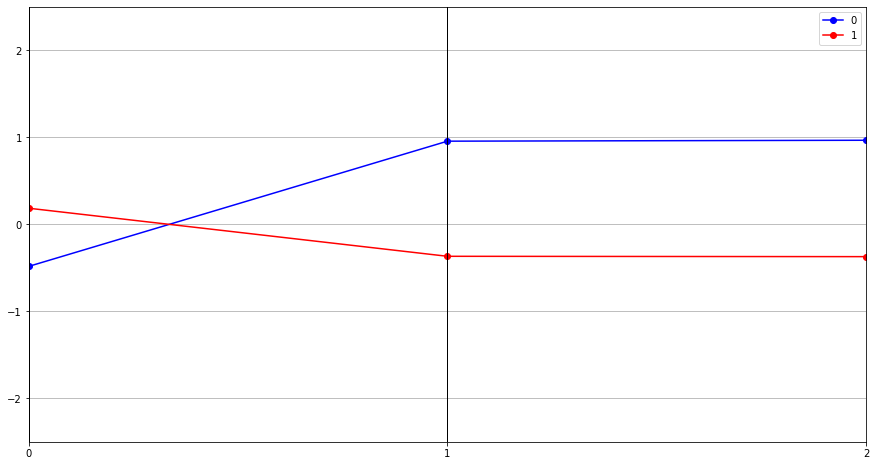

In [60]:
%matplotlib inline
P1 = pd_centers(featuresUsed=df_dummy, centers=km_2.cluster_centers_)
P1.head(3)
parallel_plot(P1)

### 3 Clusters

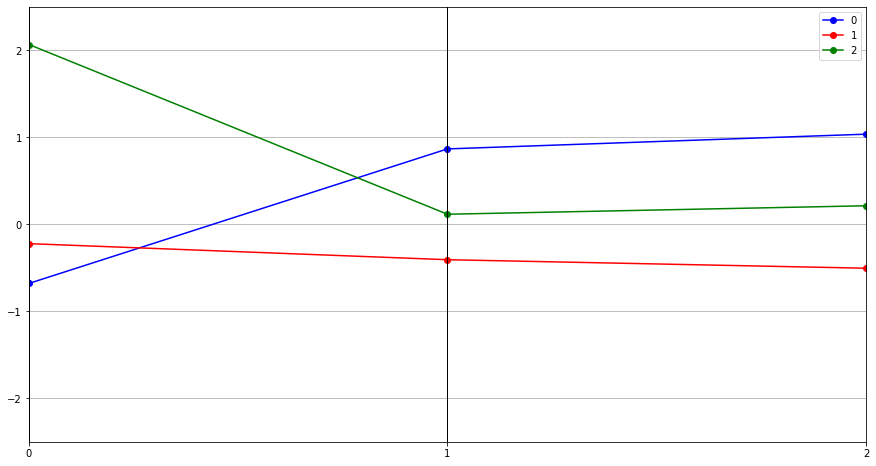

In [61]:
%matplotlib inline
P1 = pd_centers(featuresUsed=df_dummy, centers=km_3.cluster_centers_)
P1.head(3)
parallel_plot(P1)

### 4 Clusters

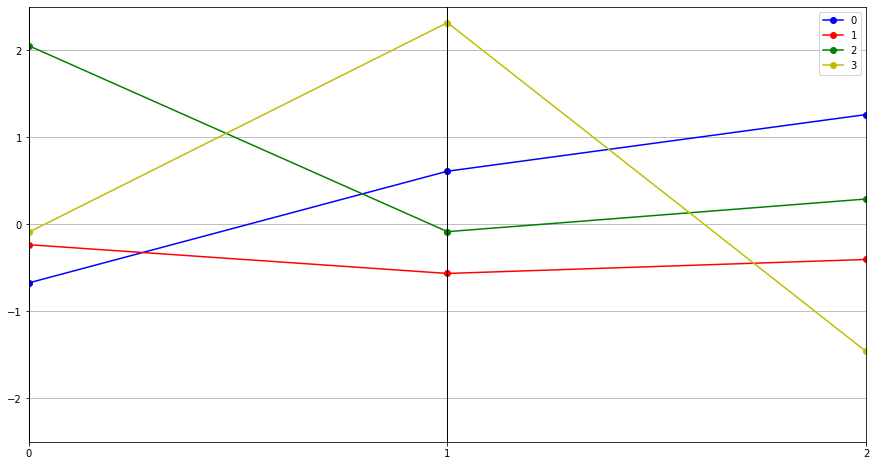

In [62]:
%matplotlib inline
P1 = pd_centers(featuresUsed=df_dummy, centers=km_4.cluster_centers_)
P1.head(3)
parallel_plot(P1)

### 5 Clusters

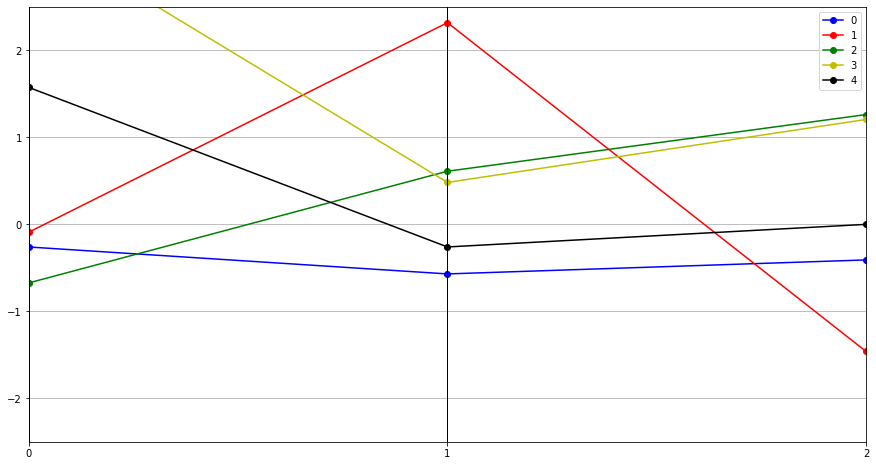

In [63]:
%matplotlib inline
P1 = pd_centers(featuresUsed=df_dummy, centers=km_5.cluster_centers_)
P1.head(3)
parallel_plot(P1)

### 6 Clusters

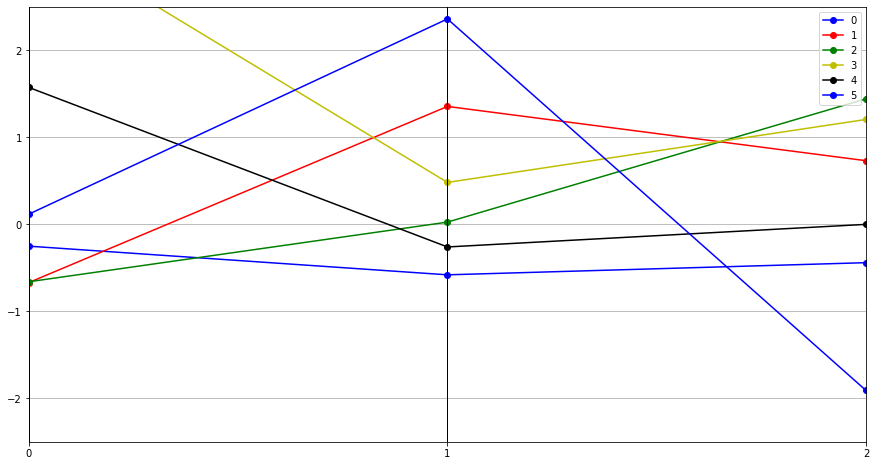

In [64]:
%matplotlib inline
P1 = pd_centers(featuresUsed=df_dummy, centers=km_6.cluster_centers_)
P1.head(3)
parallel_plot(P1)

### 7 Clusters

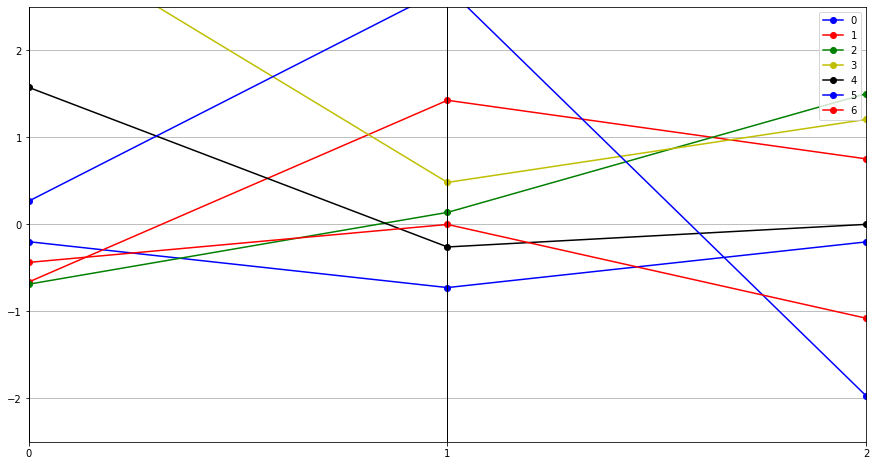

In [65]:
%matplotlib inline
P1 = pd_centers(featuresUsed=df_dummy, centers=km_7.cluster_centers_)
P1.head(3)
parallel_plot(P1)

### 8 Clusters

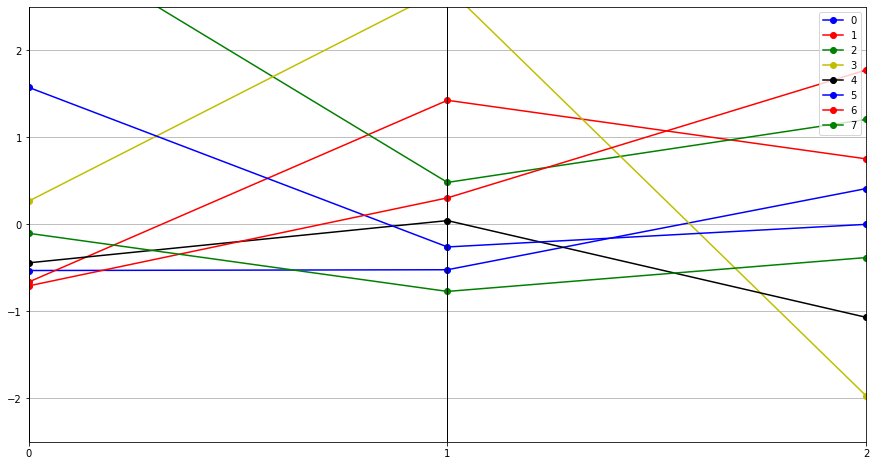

In [66]:
%matplotlib inline
P1 = pd_centers(featuresUsed=df_dummy, centers=km_8.cluster_centers_)
P1.head(3)
parallel_plot(P1)

---
<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---